# Data Visualisations

# CPPN-NEAT vs ES-HyperNEAT

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Opens CPPN-NEAT and HyperNEAT run files
with open("result data/NEAT-250.pickle", "rb") as f:
    neat = pickle.load(f)

with open("result data/HYPERNEAT-250-FINAL.pickle", "rb") as f:
    es_hyperneat = pickle.load(f)

## Highest Fitness Xenobot in Each Generation

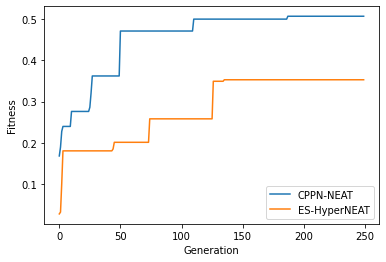

In [3]:
y = list(range(len(neat["best_each_gen"])))

plt.plot(y, neat["best_each_gen"])
plt.plot(y, es_hyperneat["best_each_gen"])
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])


## Standard Deviation of Fitness in Each Generation

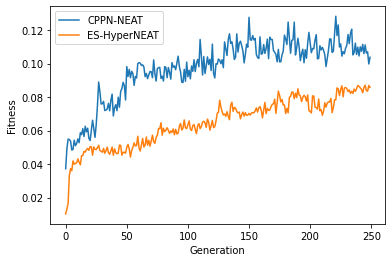

In [4]:
y = list(range(len(neat["std_dev"])))

plt.plot(y, neat["std_dev"])
plt.plot(y, es_hyperneat["std_dev"])

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])

## Mean Fitness

True


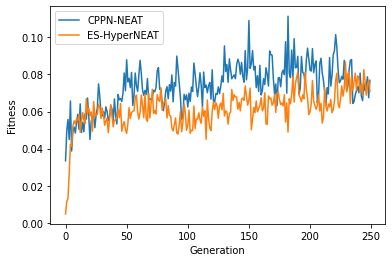

In [5]:
y = list(range(len(neat["mean"])))

plt.plot(y, neat["mean"])
plt.plot(y, es_hyperneat["mean"])

neat_50 = neat["mean"][50]
hyper_50 = es_hyperneat["mean"][50]

neat_m = (neat["mean"][-1] - neat_50) / (250 - 50)
hyper_m = (es_hyperneat["mean"][-1] - hyper_50) / (250 - 50)

print(neat_m < hyper_m)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(["CPPN-NEAT", "ES-HyperNEAT"])

# Genotype-Phenotype Map Statistics

Load pickled data here

## CPPN-NEAT

### Log phenotype probability vs complexity

## ES-HyperNEAT

# Clustering of Xenobots

In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## By Structure

### Load dataset

In [3]:
f = open("motif_data.json")
data = json.load(f)

f.close()

motifs = data["motifs"]
xenobots = data["xenobots"]
    
df = pd.DataFrame(xenobots)

df = pd.json_normalize(df["motif_counts"])
    
df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478595,2.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing

Drop last 378600 rows

In [4]:
df.drop(df.tail(378600).index, inplace=True)

Replace NaN with 0s

In [5]:
df = df.fillna(0)

df

,2429,3266,578,315,4365,4858,3755,259,3954,2159,...,3763,1887,4743,2130,4527,4757,2275,2857,2539,2540
0,2.0,12.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Apply PCA

In [6]:
pca = PCA(n_components=3)
df_reduced = pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.56387822, 0.25576167, 0.11160605])

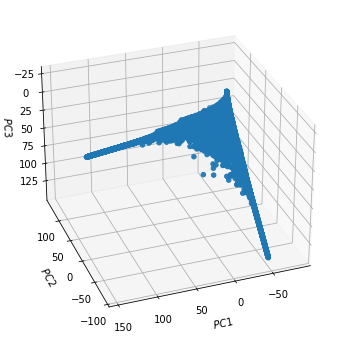

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(df_reduced[:, 0], df_reduced[:, 1], df_reduced[:, 2])
ax.set_xlabel("$PC 1$")
ax.set_ylabel("$PC 2$")
ax.set_zlabel("$PC 3$")

plt.show()

K-means

In [8]:
from tools.clustering import choose_num_clusters
from sklearn.cluster import KMeans

Choose optimal number of clusters using silhouette coefficient

/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cameron/.local/lib/python3

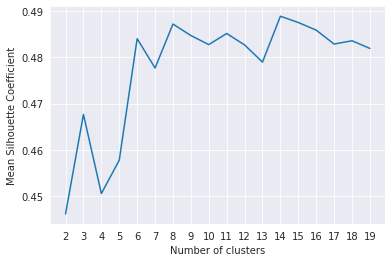

In [12]:
clusters, labels, score = choose_num_clusters(df_reduced, num_clusters=20, plot=True)

14

Run k-means

NameError: name 'labels' is not defined

Hierarchical

## By Behaviour 